# Análise exploratória dos dados

In [1]:
# Importações e configurações iniciais

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import requests
import time
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

sns.set()

%matplotlib inline

# Configurar tamanho de figura padrão
sns.set(rc={"figure.figsize": (12, 6)})

# Para habilitar configuração de autocompletar
%config Completer.use_jedi = False

sns.set_style('whitegrid')

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [3]:
# Importanto e instalando a API que fornecerá os dados

!pip -q install yfinance
import yfinance as yf

In [4]:
# Buscando pelos preços históricos do Ethereum em dólares americanos

ETH = yf.Ticker("ETH-USD")
ETH.info

{'companyOfficers': [],
 'twitter': '"https://twitter.com/ethereum"',
 'name': 'Ethereum',
 'startDate': 1438905600,
 'description': 'Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 121,326,007.1865. The last known price of Ethereum is 1,181.05902244 USD and is down -2.54 over the last 24 hours. It is currently trading on 5786 active market(s) with $12,295,706,361.17 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Ethereum USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'ETH-USD',
 'messageBoardId': 'finmb_ETH_CCC',
 'market': 'ccc_market',
 'previousClose': 1193.4385,
 'regularMarketOpen': 1193.4385,
 'twoHundredDayAverage': 2747.8794,
 'trailingAnnualDividendYield': None,
 'payoutRati

In [5]:
# Atribuindo a base a uma variável e apresentando seu cabeçalho para conhecê-la

data = ETH.history(start="2017-11-09",end="2022-05-25")
data

Open         High          Low        Close       Volume  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003    893249984   
2017-11-10   320.670990   324.717987   294.541992   299.252991    885985984   
2017-11-11   298.585999   319.453003   298.191986   314.681000    842300992   
2017-11-12   314.690002   319.153015   298.513000   307.907990   1613479936   
2017-11-13   307.024994   328.415009   307.024994   316.716003   1041889984   
...                 ...          ...          ...          ...          ...   
2022-05-21  1961.017944  1985.395996  1944.265137  1974.518311   8546822406   
2022-05-22  1974.670654  2047.191406  1966.038818  2043.170166  10941123403   
2022-05-23  2042.344727  2080.333496  1964.386597  1972.181885  16434529708   
2022-05-24  1972.390869  1991.535522  1920.688110  1978.982788  13057109007   
2022-05-25  1978.677002  2014.369507  1943.938599  1944.827881  13364545730   

            Dividends  Stock Splits  
Date                                 
2017-11-09          0             0  
2017-11-10          0             0  
2017-11-11          0             0  
2017-11-12          0             0  
2017-11-13          0             0  
...               ...           ...  
2022-05-21          0             0  
2022-05-22          0             0  
2022-05-23          0             0  
2022-05-24          0             0  
2022-05-25          0             0  

[1659 rows x 7 columns]

In [6]:
# Explorando o tipo das variáveis presentes na base

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1659 entries, 2017-11-09 to 2022-05-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1659 non-null   float64
 1   High          1659 non-null   float64
 2   Low           1659 non-null   float64
 3   Close         1659 non-null   float64
 4   Volume        1659 non-null   int64  
 5   Dividends     1659 non-null   int64  
 6   Stock Splits  1659 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 103.7 KB


In [7]:
# Retirando as informações irrelevantes para o estudo da base

data.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [8]:
# Conhecendo o comportamento das variáveis presentes na base

data.describe()

Open         High          Low        Close        Volume
count  1659.000000  1659.000000  1659.000000  1659.000000  1.659000e+03
mean   1091.207177  1127.385768  1050.132681  1091.944446  1.266161e+10
std    1256.902194  1295.582444  1212.076546  1256.418452  1.115098e+10
min      84.279694    85.342743    82.829887    84.308296  6.217330e+08
25%     199.024391   204.939133   194.808746   199.190979  3.426054e+09
50%     403.997101   417.471985   391.041504   406.217773  9.938134e+09
75%    1916.373962  1982.677063  1829.051514  1917.509094  1.800449e+10
max    4810.071289  4891.704590  4718.039062  4812.087402  8.448291e+10

In [9]:
# Como visto, a base possui registro de 1659 dias de Ethereum

formato = data.shape
print(f'A base contém {formato[0]} linhas e {formato[1]} colunas.')

A base contém 1659 linhas e 5 colunas.


In [10]:
# Checando se o tipo da coluna "Date" está como datetime

type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

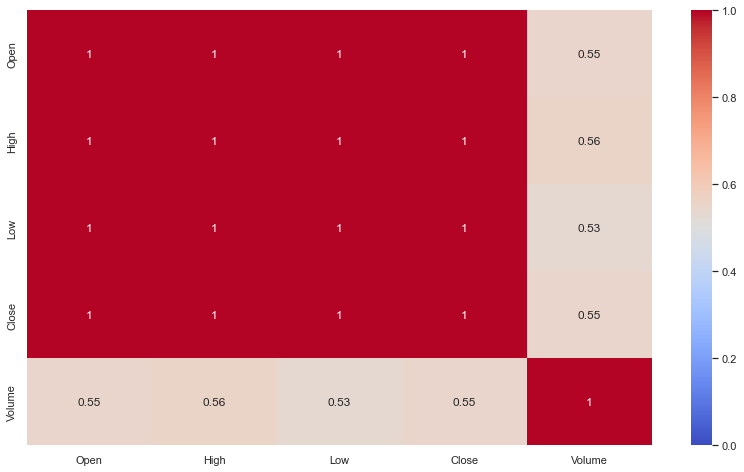

In [11]:
# Explorando a correlação entre as variáveis para decisão de quais usar para treinar os modelos

plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), vmin = 0, vmax = 1, cmap='coolwarm', annot=True);

## Como o modelo se aterá a prever a cotação da criptomoeda e, como visto, os preços de abertura, fechamento, alta e baixa estão perfeitamente correlacionados, o estudo seguirá utilizando o preço de fechamendo do dia ("Close").

Text(0.5, 1.0, 'Preço por uma unidade de Ethereum')

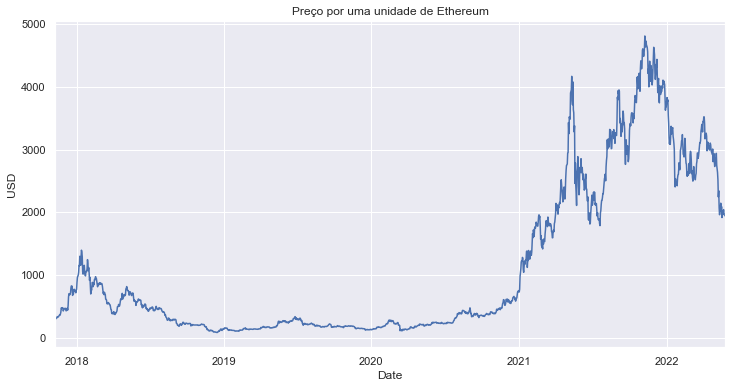

In [12]:
# Conhecendo o comportamento da variável

ax = data.Close.plot();
ax.set_ylabel('USD')
plt.title('Preço por uma unidade de Ethereum')

<AxesSubplot:xlabel='Close'>

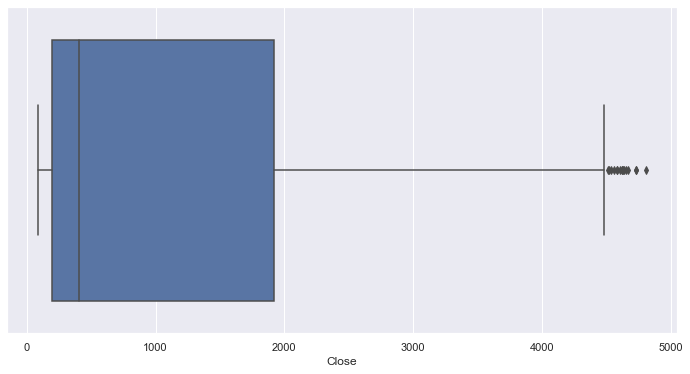

In [13]:
sns.boxplot(data.Close)

In [14]:
data['ano'] = data.index.year

Text(0, 0.5, 'Preço de fechamento [USD]')

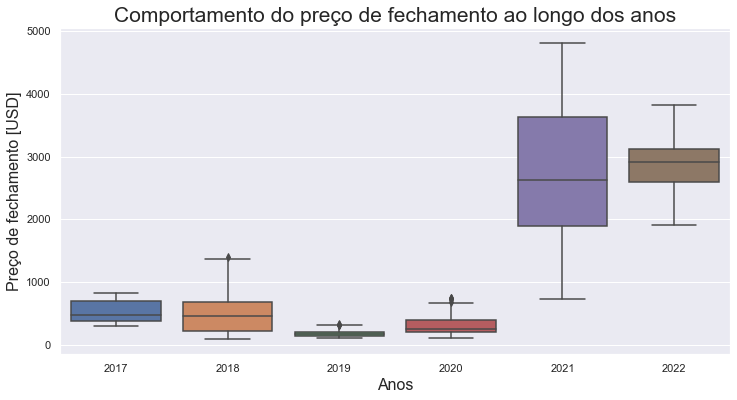

In [15]:
sns.boxplot(x = 'ano', y = 'Close', data = data)
plt.title("Comportamento do preço de fechamento ao longo dos anos", fontsize = 21)
plt.xlabel("Anos", fontsize = 16)
plt.ylabel("Preço de fechamento [USD]", fontsize = 16)

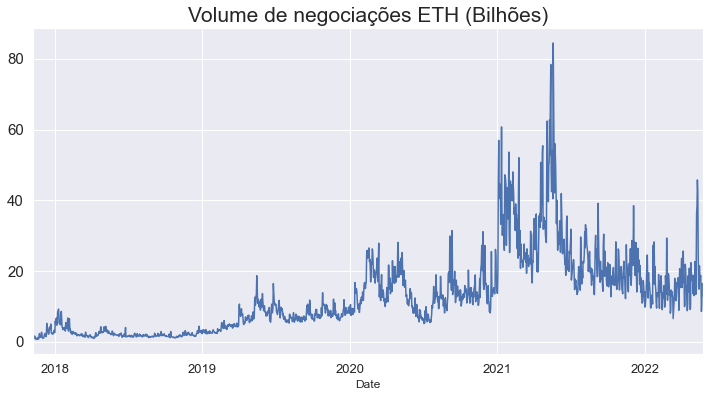

In [16]:
data['volume_bilhoes'] = data.Volume / 1000000000
ax = data.volume_bilhoes.plot();
plt.title('Volume de negociações ETH (Bilhões)', fontsize = 21)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 13)
plt.show;

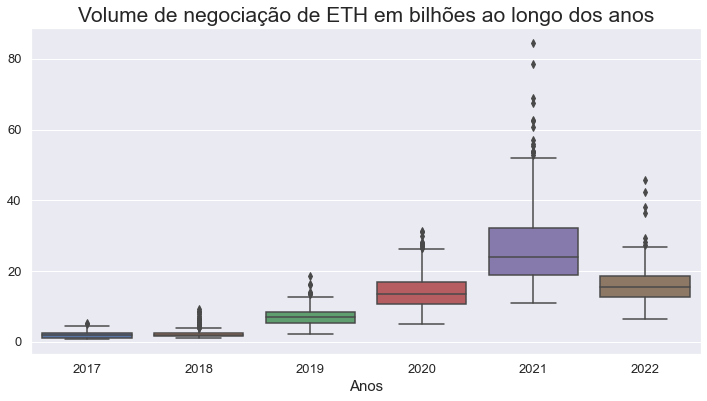

In [17]:
sns.boxplot(x = 'ano', y = 'volume_bilhoes', data = data)
plt.title("Volume de negociação de ETH em bilhões ao longo dos anos", fontsize = 21)
plt.xlabel("Anos", fontsize = 15)
plt.ylabel("")
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show;

In [18]:
def plot_roi(amount, df):
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

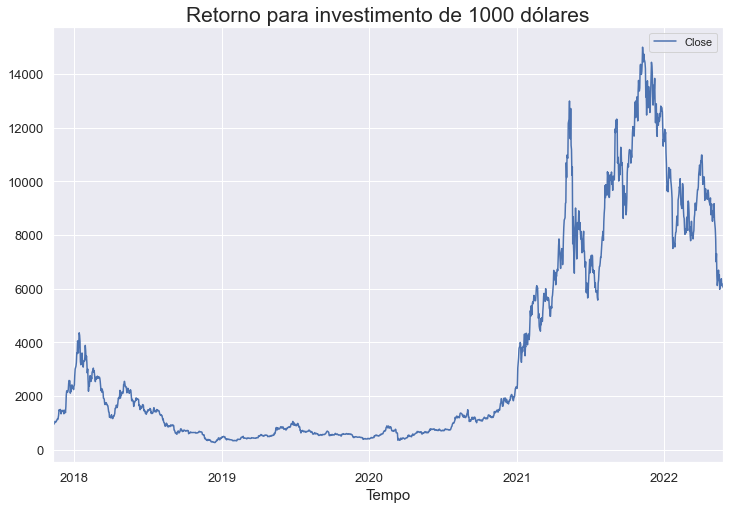

In [19]:
# Supondo que investimos 1000 dólares, o retorno:

plot_roi(1000, data[['Close']])
plt.title("Retorno para investimento de 1000 dólares", fontsize = 21)
plt.xlabel("Tempo", fontsize = 15)
plt.ylabel("")
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show;

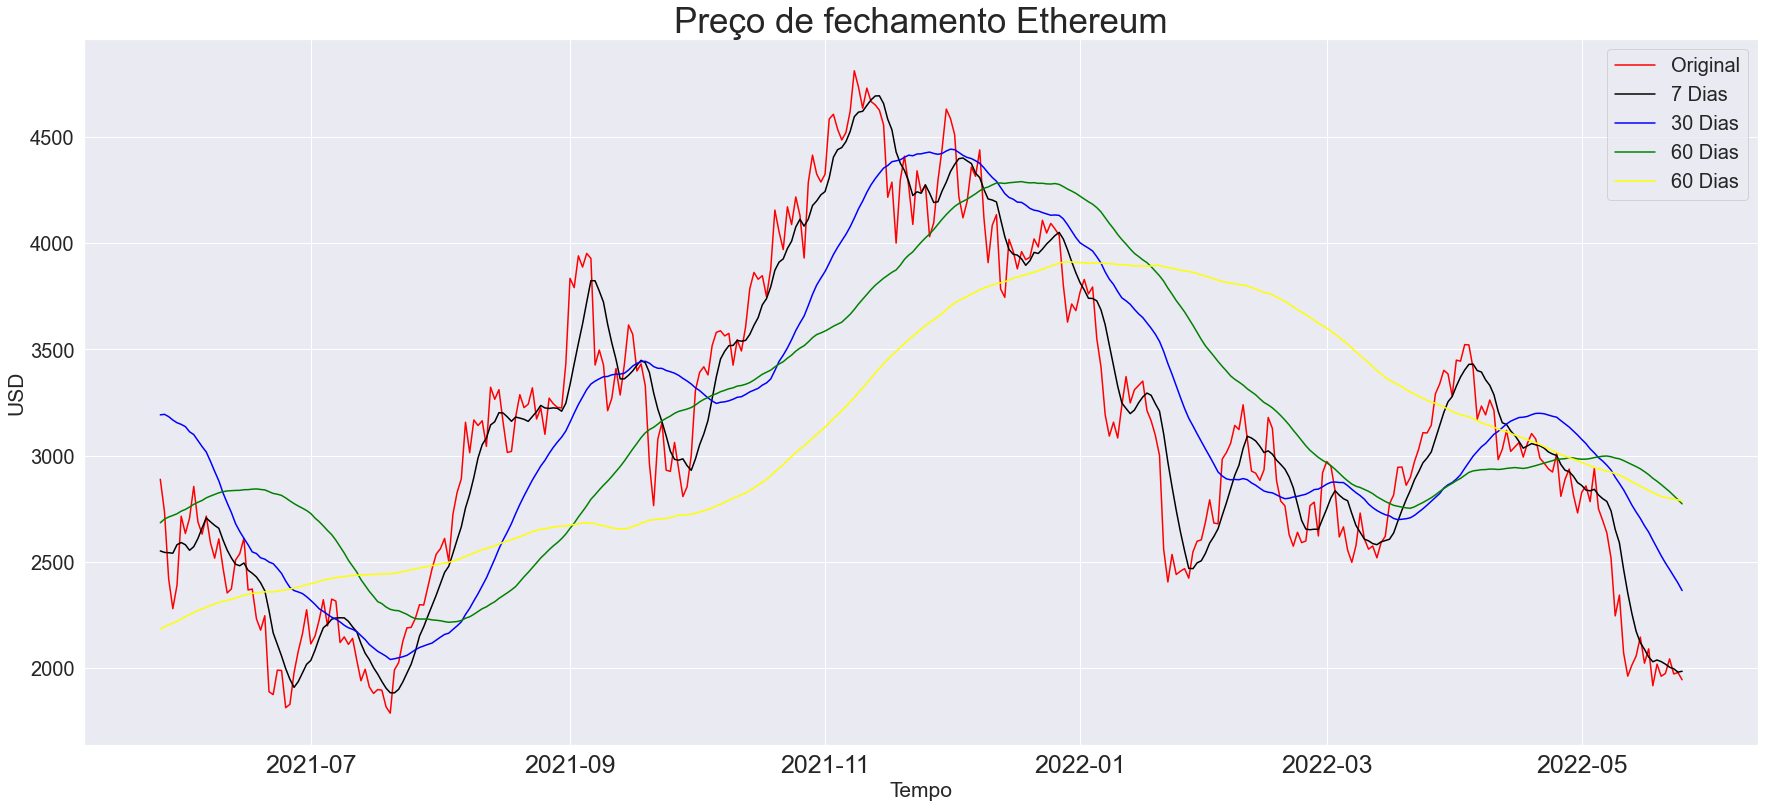

In [20]:
# fazendo média movel de 7, 30 e 60 dias

preco_7 = data.Close.rolling(7).mean()
preco_30 = data.Close.rolling(30).mean()
preco_60 = data.Close.rolling(60).mean()
preco_120 = data.Close.rolling(120).mean()

plt.figure(figsize=(30,13))
plt.plot(data.Close[-365:], color = "red",label = "Original")
plt.plot(preco_7[-365:], color='black', label = "7 Dias")
plt.plot(preco_30[-365:], color='blue', label = "30 Dias")
plt.plot(preco_60[-365:], color='green', label = "60 Dias")
plt.plot(preco_120[-365:], color='yellow', label = "60 Dias")
plt.title("Preço de fechamento Ethereum", fontsize = 35)
plt.xlabel("Tempo", fontsize = 21)
plt.ylabel("USD", fontsize = 21)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 20)
plt.show()

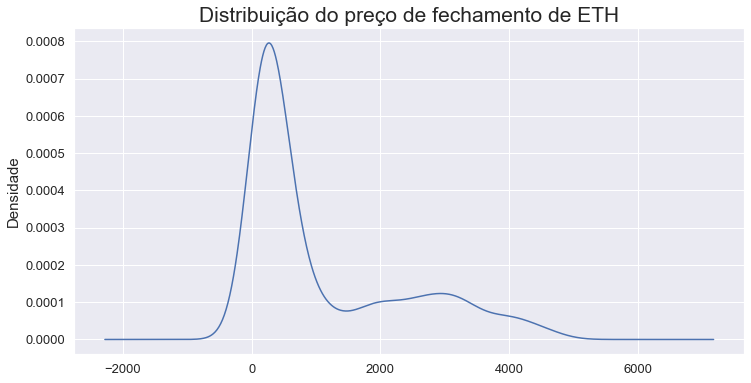

In [21]:
# Distribuição dos preços de fechamento do ETH para a janela de tempo analisada

data.Close.plot(kind='kde')
plt.title("Distribuição do preço de fechamento de ETH", fontsize = 21)
plt.ylabel("Densidade", fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show;

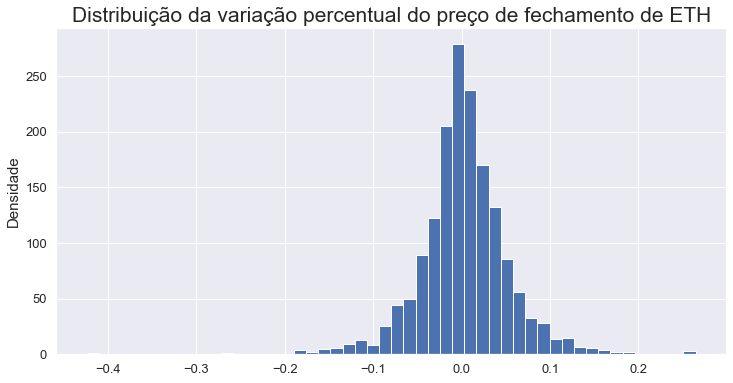

In [22]:
# Criando uma nova feature de variação percentual de um dia para o outro no preço de fechamento de ETH

data['pct_change'] = data.Close.pct_change()

data['pct_change'].hist(bins = 50)
plt.title("Distribuição da variação percentual do preço de fechamento de ETH", fontsize = 21)
plt.ylabel("Densidade", fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show;

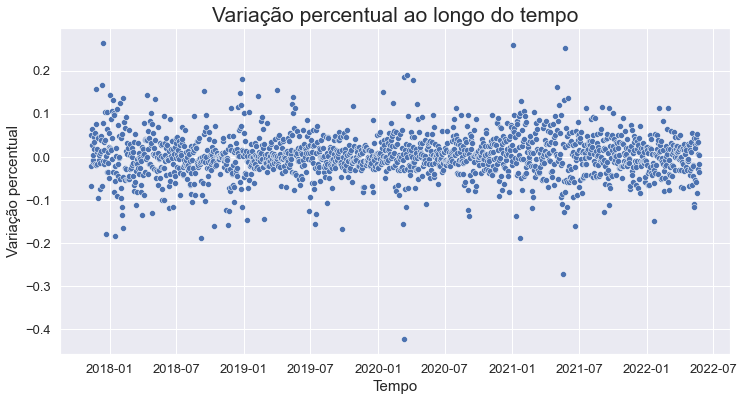

In [23]:
# Conhecendo essa distribuição de variações ao longo do tempo
# Percebe-se que sua média é, aproximadamente, constante
sns.scatterplot(y = data['pct_change'], x = data.index)

plt.title("Variação percentual ao longo do tempo", fontsize = 21)
plt.ylabel("Variação percentual", fontsize = 15)
plt.xlabel("Tempo", fontsize = 15)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.show;

Pode-se perceber com esse gráfico que as variações percentuais de um dia para o outro na cotação no Ethereum costumam estar em menos de 10% de flutuação e que, na maioria das vezes, variam muito pouco (média em torno de 0)

Essa informação traz 

In [24]:
# Com esse gráfico interativo é possível analisar melhor os preços nas janelas de interesse

import plotly.graph_objects as go

eth=data.reset_index()

fig = go.Figure(data=go.Ohlc(x=eth['Date'],
        open=eth['Open'],
        high=eth['High'],
        low=eth['Low'],
        close=eth['Close']))
fig.show()

# ARIMA

Tendo conhecido um pouco melhor os dados trabalhados, começa-se a desenvolver o primeiro modelo preditivo utilizado no estudo:

ARIMA (Autoregressive Integrated Moving Average) é um dos modelos preditivos mais famosos de séries temporais. Para seu ajuste, deve-se achar 3 parâmetros, relacionados a cada uma de suas características:

    - AR (Auto-regression): Termo autoregressivo, que leva em conta os valores passados.
    - I (Integral): Termo que busca identificar semelhança nos dados através da diferenciação dos dados e seus valores anteriores
    - MA (Moving Average): Média mível do modelo, indica que o erro de regressão é uma combinação linear dos erros ocorridos nopassado, buscando uma direção de tendência dos dados.

## Série temporal

Uma série temporal mostra variáveis de interesse descritas no tempo. Esta pode ser decomposta em 3 componentes básicas:
    - Tendência
    - Sazonalidade
    - Ruído
    
Assim, realiza-se a decomposição da série temporal estudada para conhecer melhor o comportamento de suas 3 principais componentes:

<Figure size 864x432 with 0 Axes>

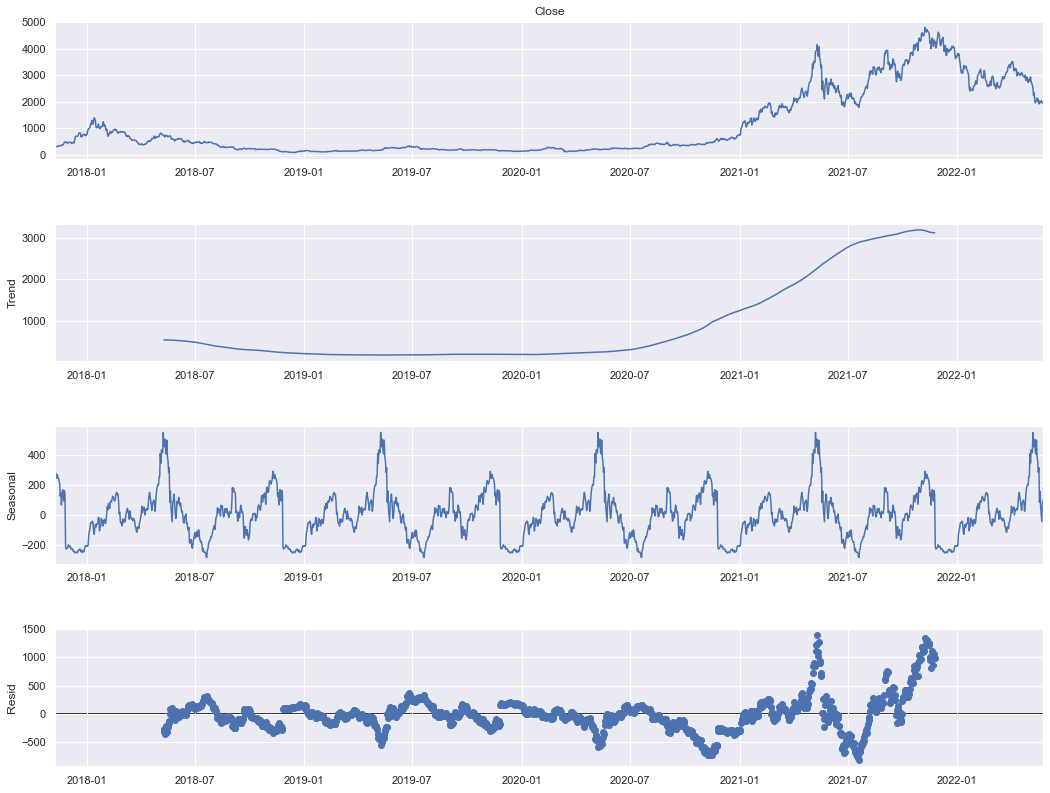

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(data.Close, model='additive', freq=365)

fig = plt.figure()  
fig = resultado.plot()  
fig.set_size_inches(15, 12)
plt.show;

## Estacionariedade

Estacionariedade é uma característica importante na série temporal para desempenho de modelos e algortimos preditivos. Uma série temporal é estacionária se sua média não varia ao longo do tempo (I). 

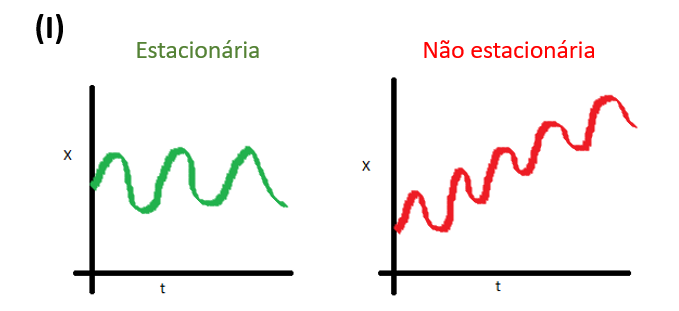

Para ser estacionária, a série temporal também precisa que sua variância não seja função do tempo, característica conhecida como homocedasticidade (II). 

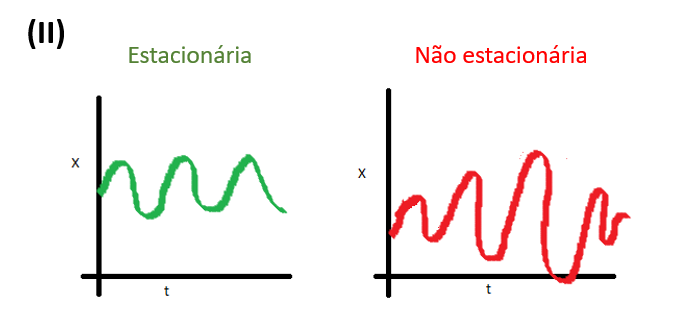

Por fim, a covariância entre seus valores e seus valores passados também não deve ser função do tempo (III).

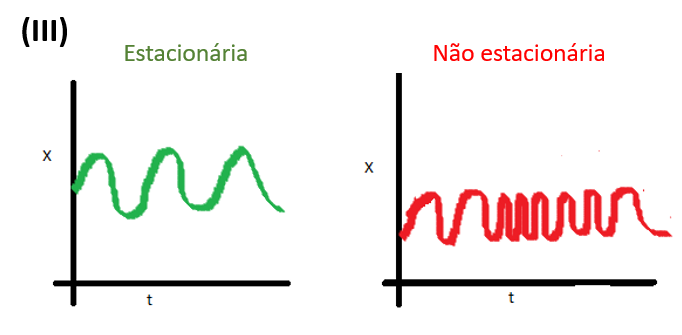

Visto isso, percebe-se que séries estacionárias não possuem tendência ou sazonalidade.

A estacionariedade é importante porque em séries temporais, ao contrário de uma regressão linear que supôe que as observações são independentes entre si, suas observações são dependentes do tempo. Bons resultados, muitas vezes, dependem de variáveis aleatórias independentes (como lei dos grandes números e teorema do limite central). Assim, ao se tornar uma série estacionária, pode-se aplicar técnicas de regressão a essa variável dependente do tempo.

### Avaliando a estacionariedade da série temporal de estudo

Primeiramente, será realizada uma análise inicial visual.

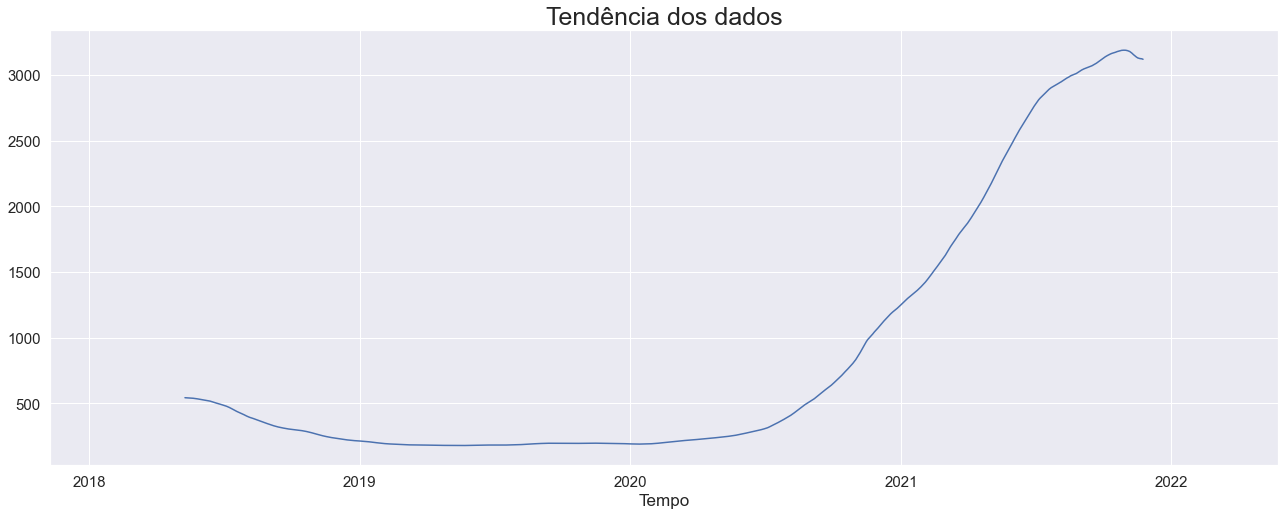

In [26]:
plt.figure(figsize=(22, 8))
resultado.trend.plot()

plt.title("Tendência dos dados", fontsize = 25)
plt.xlabel("Tempo", fontsize = 17)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show;

Observando-se a componente "tendência" obtida através da decomposição da série temporal através da funcao "seasonal_decompose" do módulo "seasonal" da biblioteca "statsmodels", infere-se que a série temporal aparenta possuir uma tendência bem acentuada de metade de 2020 até aproximadamente fevereiro de 2022.

Entretanto, para confirmar, opta-se por realizar testes estatísticos mais formais para inferir a estacionariedade ou não de uma série temporal.

O principal teste estatístico utilizado para avaliação de estacionariedade de uma série é o teste de de Dickey-Fuller.

### Teste de Dickey-Fuller

O teste, basicamente, é um teste de hipótese que verifica se a série temporal possui ou não raiz unitária. Isso é um forte indício de não estacionariedade. Quanto mais próximo de 1 o primeiro coeficiente em um modelo AR(!), mais tempo leva para as observações retornarem ao valor médio. Isso indica não estacionariedade. Para o processo ser estável, o coeficiente deve ser menor que 1 ou muito próximo de 0. Com isso, não há evidência de tendência estocástica na série temporal. Em resumo, o ADF, como é conhecido, testa:
    
    -Ho: Tem raiz unitária (não é estacionária)
    -H1: Não tem raiz unitária (é estacionária)

Assim, se o p-valor resultante do teste for mais baixo do que o nível de significância adotado, não há evidência de tendência estocástica na série temporal e, por isso, pode-se adotá-la como estacionária.

In [27]:
# Importando o módulo que axiliará na aplicação do teste para a série
from statsmodels.tsa.stattools import adfuller

def teste_estacionariedade(dados, janela = 30, significancia = 0.01):

    #Determing rolling statistics
    rolling_mean = dados.rolling(janela).mean()
    rollling_std = dados.rolling(janela).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    real = plt.plot(dados, color='blue',label='Real')
    media = plt.plot(rolling_mean, color='red', label='Média móvel')
    desv_pad = plt.plot(rollling_std, color='black', label = 'Desvio padrão')
    plt.legend(loc='best')
    plt.title('Média móvel e desvio padrão', fontsize=25)
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Resultados do teste de Dickey-Fuller:\n')
    teste = adfuller(dados, autolag='AIC')
    resultado = pd.Series(teste[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for rotulo,valor in teste[4].items():
        resultado['Valor crítico (%s)'%rotulo] = valor
    p_valor = teste[1]
    if p_valor < significancia:
        print('p-valor = %.4f. Série parece ser estacionária.\n' % p_valor)
    else:
        print('p-valor = %.4f. Série parece não ser estacionária.\n' % p_valor)
    
    print(resultado)

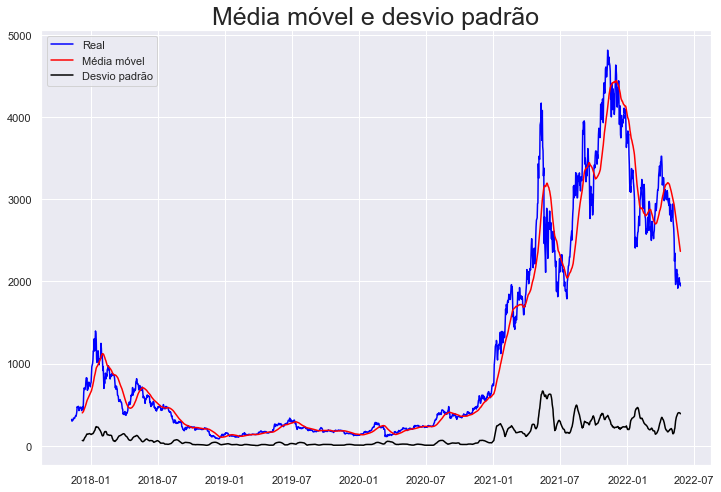

Resultados do teste de Dickey-Fuller:

p-valor = 0.6895. Série parece não ser estacionária.

Test Statistic                   -1.162526
p-value                           0.689505
#Lags Used                       17.000000
Number of Observations Used    1641.000000
Valor crítico (1%)               -3.434341
Valor crítico (5%)               -2.863303
Valor crítico (10%)              -2.567709
dtype: float64


In [28]:
teste_estacionariedade(data['Close'])

### Inferências

Como visto pelo p-valor apresentado pelo teste ADF, a série está longe de ser estacionária, como já apresentava indícios na inspeção visual. O nível de significância adotado foi de 1%. Por isso, para a série ser tratada como estacionária nesse estudo, é preciso que o p-valor seja menor do que 0,01.

### Tornando a série estacionária

Entretando, há técnicas para tornar uma série estacionária, como log, diferenciação, etc. Realizará-se o teste com a forma mais comum de tornar uma série estacionária que é a diferenciação e, após isso, se avaliará os resultados

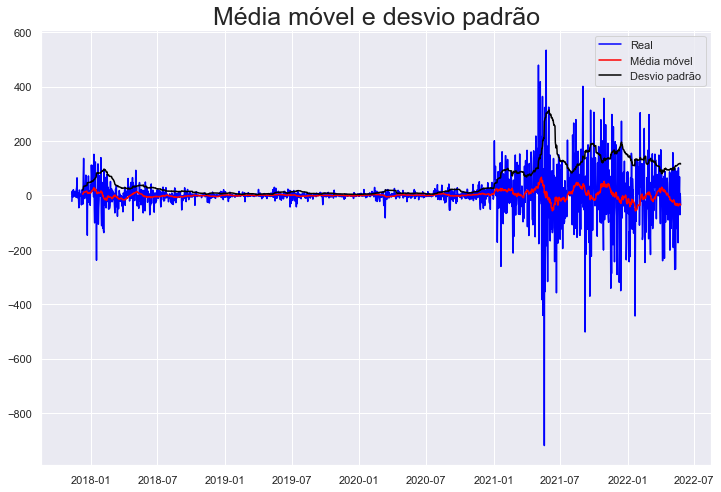

Resultados do teste de Dickey-Fuller:

p-valor = 0.0000. Série parece ser estacionária.

Test Statistic                -1.021277e+01
p-value                        5.581982e-18
#Lags Used                     1.600000e+01
Number of Observations Used    1.641000e+03
Valor crítico (1%)            -3.434341e+00
Valor crítico (5%)            -2.863303e+00
Valor crítico (10%)           -2.567709e+00
dtype: float64


In [29]:
diff_1 = data['Close'] - data['Close'].shift(1)
diff_1 = diff_1.dropna()
# diff_2 = (diff_1 - diff_1.shift(1)).dropna()
teste_estacionariedade(diff_1, janela = 30)

Como visto, o p-valor obtido com a série após aplicada a diferenciação é extremamente pequeno e (muito menor do que o níel de significância de 0,01 proposto), com isso, a série pode ser considerada estacionária para seguimento do estudo e aplicação das técnicas descritas do modelo.

### Autocorrelação

#### ACF e PACF

Uma outra característica muito importante a se observar em uma série temporal é a sua autocorrelação. Essa medida explica o quanto os valores no momento atual são explicados pelos valores em tempos anteriores. Para isso, existe a autocorrelação (ACF) e a autocorrelação parcial. Elas, geralmente são calculadas pelo método de Pearson.

<b><u>Diferença entre ACF e PACF:</b></u> A diferença básica entre essas medidas estão na maneira de mensurar a influência de uma medida em um intervalo de tempo em outra medida em um intervalo de tempo distinto. A autocorrelação (ACF) é calculada levando em conta os efeitos das infuências diretas e indiretas das medidas, enquanto a autocorrelação parcial (PACF) apresenta apenas a influência direta. Por exemplo: ACF de uma medida no tempo t com um tempo (t-2) leva em conta também a influência indireta da medida de (t-2) em (t-1) e esta, finalmente, em t. Em contrapartida, a PACF indicaria apenas a influência direta da medida em (t-2) em t.

#### Importância das autocorrelações para o modelo

Essas medidas são muito importantes em modelos previsores de séries temporais, já que estes partem da premissa de prever valores futuros conhecendo os valores passados. Portanto, saber o quanto esses valores são explicados pelos valores passados possuem grande relevância.

Falando de ARIMA, esses valores são essenciais para escolha dos parâmetros do modelo. De maneira que:

    - Para a parte autoregressiva(AR): O ACF indica a dependência direta e indireta. O que se espera deste para a série AR(i) é que apresente uma forte autocorrelação para o atraso i e que esse valor fosse se enfraquecendo. Para o ACF, como ele indica apenas a dependência direta, este deveria indicar que não há uma correlação entre o valor presente e o valor em (t-i).
    
    - Para a parte de média móvel (MA): sabendo-se que o processo é um modelo de autoregressão da série temporais com os resíduos de predições anteriores, ou seja, usa os erros de previsões passados para ajudar a prever os valores futuros. Assim, para um modelo MA(k), espera-se que há uma forte correlação entre o valor atual e o valor passado defasado em k períodos e que caia drasticamente para intervalos maiores. Para o PACF, espera-se que haja uma forte correlação parcial entre o valor atual e o valor defasado em k intervalos anteriores e uma queda desse valor para intervalos maiores .

#### Calculando ACF e PACF para os dados de estudo

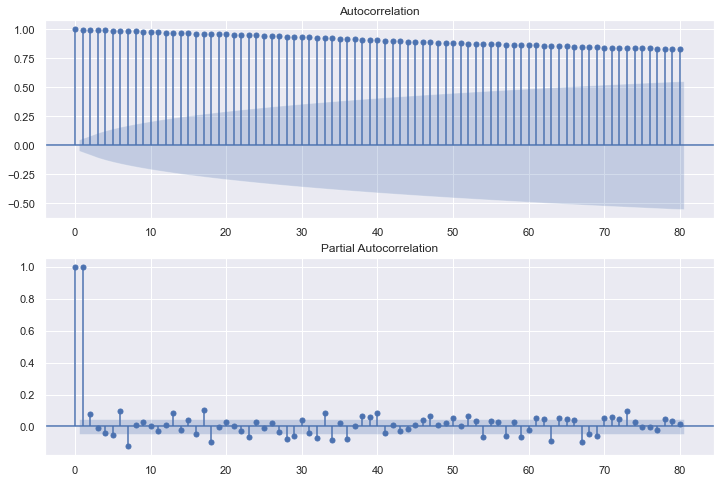

In [30]:
# Importando módulo que auxiliará no cálculo dessas medidas
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Close'], lags=80, ax=ax1)  # "lag" é o período de tempo entre uma medida e outra 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'], lags=80, ax=ax2)

#### Calculando agora para a série diferenciada calculada

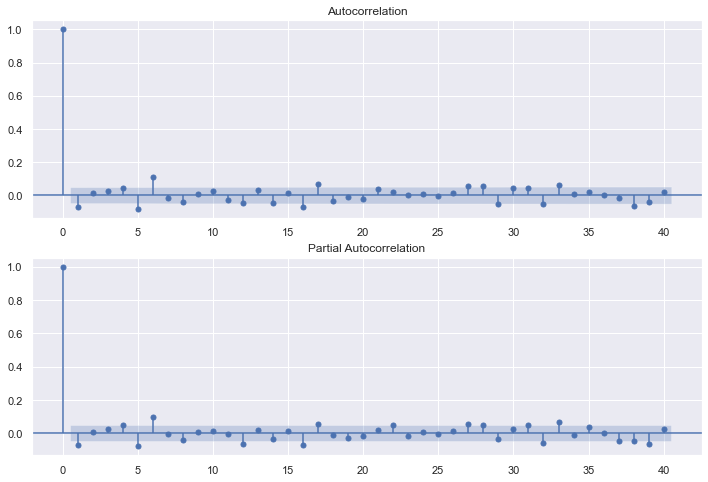

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_1, lags=40, ax=ax2)

Essas medidas também podem ser indicadoras de sazonalidade se apontarem um padrão de valor a cada x periodos, por exemplo.

Vale ressaltar que a área azul preenchida mostrada indica o grau de significancia, ou seja, pontos dentro dessa área não possuem evidência estatística de serem diferente de zero.

### Construindo o modelo

Como a série foi diferenciada uma vez, I=1 (d=1). Para a componente AR (parâmetro p), deve-se olhar para para o PACF. Percebe-se que apenas o lags 0 e 1 são significantes. Assim, será usado p = 1. O mesmo ocorre para o PCAF, assim MA(q) sera utilizado como q = 1.

In [32]:
mod_arima = sm.tsa.ARIMA(data.Close, (1,1,1)).fit(disp=False)
print(mod_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1658
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9620.430
Method:                       css-mle   S.D. of innovations             80.117
Date:                Tue, 28 Jun 2022   AIC                          19248.859
Time:                        15:29:36   BIC                          19270.513
Sample:                    11-10-2017   HQIC                         19256.886
                         - 05-25-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9819      1.844      0.532      0.594      -2.633       4.597
ar.L1.D.Close    -0.1422      0.286     -0.498      0.619      -0.702       0.418
ma.L1.D.Close     0.0706      0.288     

Um dos principais parâmetros a se observar é o AIC. Este é um parâmetro que mede o quanto o modelo se ajusta aos dados propostos. É uma medida de distância, então, esse caso, quanto menor, melhor. Como se pode observar, o AIC está bem alto, o que indica que talvez o modelo não esteja performando bem.

### Analisando os resultados

Para avaliar os resultados do modelo, pode-se plotar a distribuição dos resíduos para ver se estão normalmente distribuídos. Deve-se plotar também o ACF e o PACF. Para um bom resultado do modelo, estes devem mostrar ausencia de significancia nos termos. Ademais, os resíduos devem estar normalmente distribuídos.

NormaltestResult(statistic=588.4443716428146, pvalue=1.663137837845665e-128)


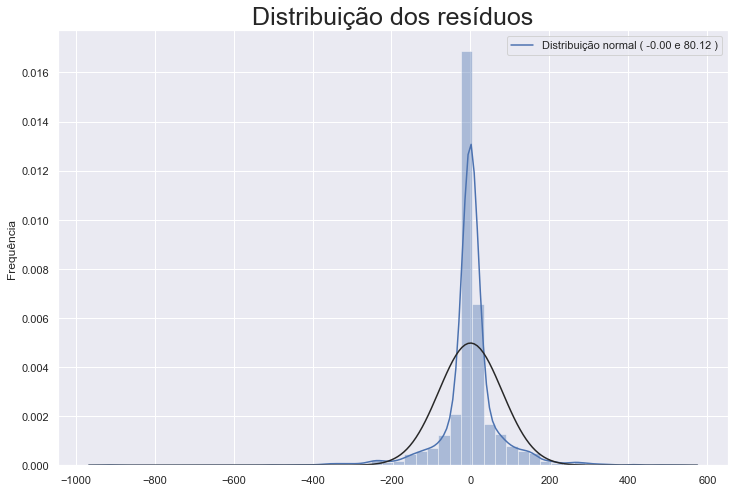

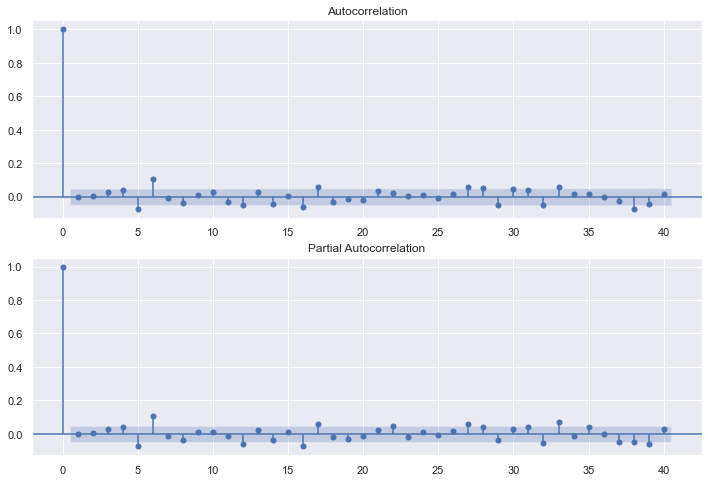

In [33]:
from scipy import stats
from scipy.stats import normaltest

residuos = mod_arima.resid
print(normaltest(residuos)) # returna uma tupla do valor estatístico Qui-quadrado e o p-valor associado.

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(residuos ,fit = stats.norm, ax = ax0) 

# Recebe os parâmetros ajustados usados pela função
(mu, sigma) = stats.norm.fit(residuos)

# Plotando a distribuição 
plt.legend([f'Distribuição normal ( {mu:.2f} e {sigma:.2f} )'], loc='best')
plt.ylabel('Frequência')
plt.title('Distribuição dos resíduos', fontsize = 25)


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuos, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuos, lags=40, ax=ax2)

Como pode se pode desconfiar através do atributo gráfico e se confirmar através do teste de normalidade (p-valor extremamente baixo) que os resíduos não estão normalmente distribuídos

A fim de contornar o problema, testa-se utilizar outro modelo, o SARIMA, que leva em conta também, ao contrário do ARIMA, o fator de sazonalidade. Assim:

In [34]:
mod_sarima = sm.tsa.statespace.SARIMAX(data.Close, trend='n', order=(1,1,1)).fit()
print(mod_sarima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1659
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -9620.573
Date:                Tue, 28 Jun 2022   AIC                          19247.146
Time:                        15:29:37   BIC                          19263.386
Sample:                    11-09-2017   HQIC                         19253.166
                         - 05-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1419      0.151     -0.941      0.347      -0.437       0.154
ma.L1          0.0704      0.153      0.460      0.646      -0.230       0.371
sigma2      6435.0231     75.525     85.204      0.0

NormaltestResult(statistic=573.5833272168588, pvalue=2.8051948893389724e-125)


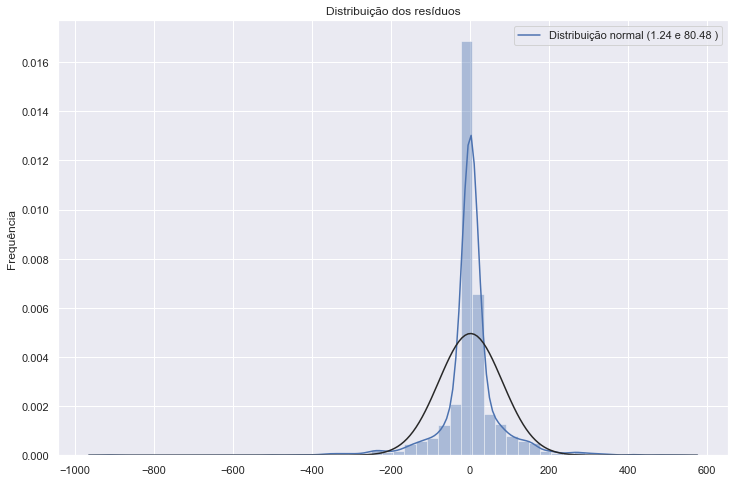

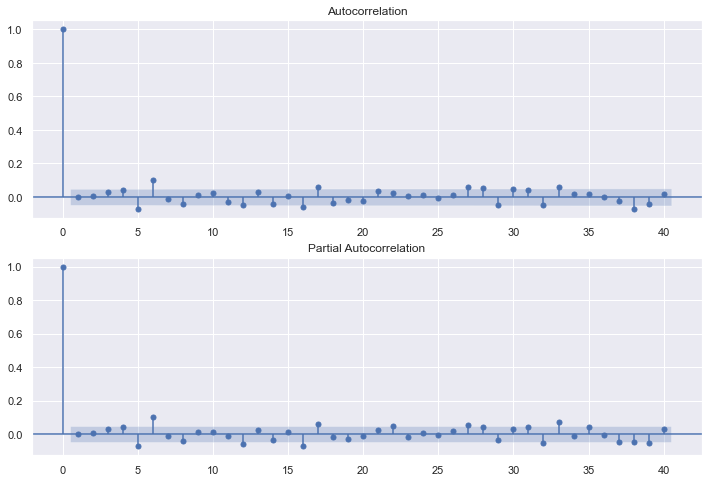

In [35]:
residuos = mod_sarima.resid
print(normaltest(residuos))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(residuos ,fit = stats.norm, ax = ax0) 

(mu, sigma) = stats.norm.fit(residuos)

plt.legend([f'Distribuição normal ({mu:.2f} e {sigma:.2f} )'], loc='best')
plt.ylabel('Frequência')
plt.title('Distribuição dos resíduos')


# ACF e PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuos, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuos, lags=40, ax=ax2)

In [36]:
data.shape

(1659, 8)

<AxesSubplot:xlabel='Date'>

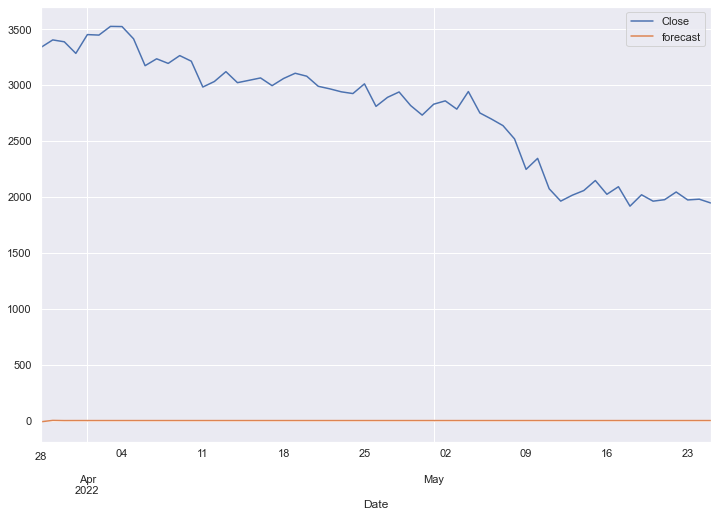

In [37]:
start_index = 1600
end_index = 1659
data['forecast'] = mod_arima.predict(start = start_index, end= end_index, dynamic= True)  
data[start_index:end_index][['Close', 'forecast']].plot(figsize=(12, 8))

In [38]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [39]:
smape_kun(data[1600:1659]['Close'],data[1600:1659]['forecast'])

MAPE: 99.97 % 
SMAPE: 199.85 %


<AxesSubplot:xlabel='Date'>

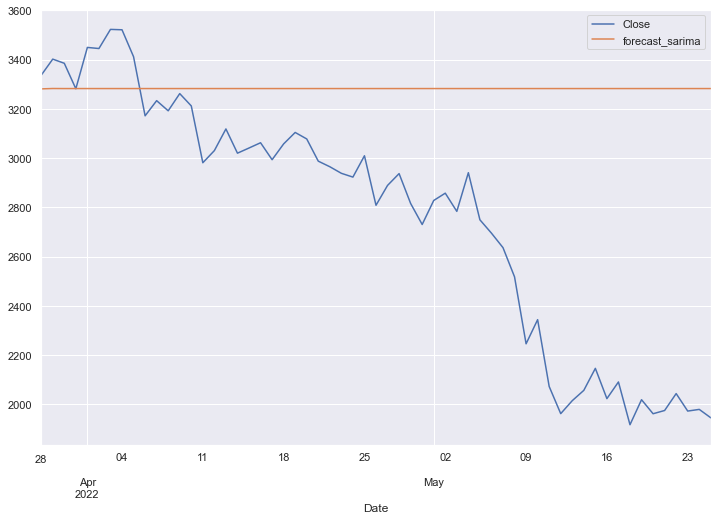

In [40]:
data['forecast_sarima'] = mod_sarima.predict(start = start_index, end= end_index, dynamic= True)  
data[start_index:end_index][['Close', 'forecast_sarima']].plot(figsize=(12, 8))

In [41]:
smape_kun(data[1600:1659]['Close'],data[1600:1659]['forecast_sarima'])

MAPE: 24.55 % 
SMAPE: 19.96 %


Como pode ser percebido, os modelos não performaram bem em realizar previsões. Assim, o estudo seguirá testando novas possibilidades e ajustes 

Visando suavizar a curva para melhor ajuste do modelo, o estudo passará a analisar os preço médio mensal de fechamento do Ethereum

In [42]:
eth_mensal = data[['Close']].resample('M').mean()

Para conhecer melhor o comportamento do novo conjunto de dados adotados, será feita sua decomposição em suas componentes de série temporal: tendência, sazonalidade e ruído.

Dickey–Fuller test: p=0.003826


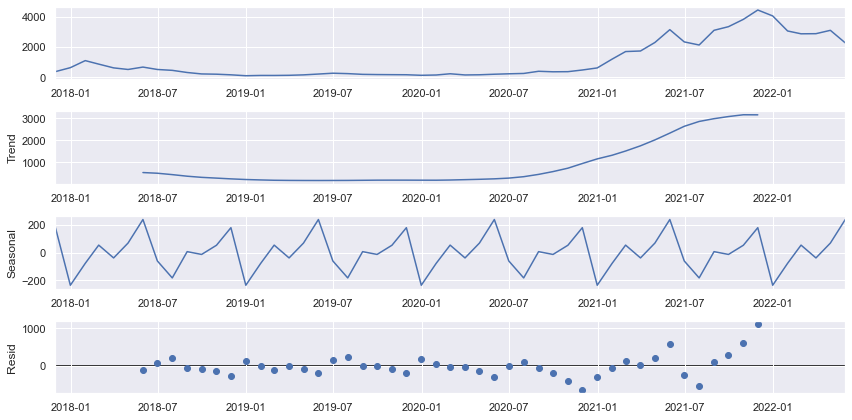

In [43]:
seasonal_decompose(eth_mensal).plot()
print("Dickey–Fuller test: p=%f" % adfuller(eth_mensal)[1])
plt.show()

Como forma de tornar a série estacionária, desta vez, será utilizada a transformação de Box-Cox para suprimir a expressividade da variância na série. A transformação de Box-Cox necessita do ajuste do parâmetro "lambda". A transformação costuma trazer a característica de estacionariedade da série porque traz normalidade e homocedasticidade para os dados. Entretando, e hipótese de estacionariedade pode continuar ainda ser rejeitada mesmo após a transformação. Isso será checado posteriormente

### Transformação de Box-cox

In [44]:
eth_mensal['close_box'], lmbda = stats.boxcox(eth_mensal.Close)
print(f"Teste de Dickey–Fuller: p={adfuller(eth_mensal['close_box'])[1]}")
print(f"Parâmetro lambda escolhido pelo modelo: {lmbda:.4f}")

Teste de Dickey–Fuller: p=0.6872405154071297
Parâmetro lambda escolhido pelo modelo: -0.2714


Como visto, ainda não há evidência estatistica para adotar a série como estacionária. Sendo assim, deve-se encontrar outras alternativas

In [45]:
# A fim de se conhecer um pouco melhor o resultado da transformação
eth_mensal['close_box'].describe()

count    55.000000
mean      2.990274
std       0.205049
min       2.653315
25%       2.814585
50%       2.961079
75%       3.211422
max       3.307580
Name: close_box, dtype: float64

O valor indica que a série não é estacionária. Para avançar na modelagem, será realizada uma diferenciação sazonal de 12 meses.

In [46]:
eth_mensal['box_diff_seasonal_12'] = eth_mensal.close_box - eth_mensal.close_box.shift(12)
print(f" teste de Dickey–Fuller: p={adfuller(eth_mensal.box_diff_seasonal_12[12:])[1]}")

 teste de Dickey–Fuller: p=0.17910684730079507


Mesmo assim, a série ainda não é estacionária. Deve-se continuar a manipular os dados até que o quesito seja atendido.

Realizando uma diferenciação sazonal de 3 meses:

In [47]:
eth_mensal['box_diff_seasonal_3'] = eth_mensal.close_box - eth_mensal.close_box.shift(3)
print(f" teste de Dickey–Fuller test: p={adfuller(eth_mensal.box_diff_seasonal_3[3:])[1]}")

 teste de Dickey–Fuller test: p=0.04628115882722946


A série, com esse p-valor obtido através do teste de Dickey-Fuller possui evidência estatistica de estacionariedade para grau de confiança de 95%, mas como  o valor está próximo do valor crítico e com intuito de maior conservadorismo, será exigido um grau de 99% para o presente estudo

Realizando a diferenciação da série transformada e realizada diferenciação sazonal de 12 meses:

Dickey–Fuller test: p=0.000002


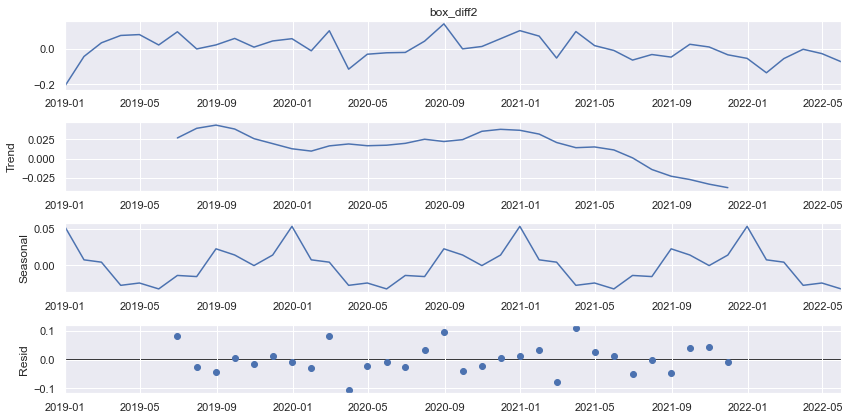

In [48]:
# Diferenciação 
eth_mensal['box_diff2'] = eth_mensal.box_diff_seasonal_12 - eth_mensal.box_diff_seasonal_12.shift(1)

# Observando a decomposição da série gerada junto com o novo p-valor obtido para o teste de Dickey-Fuller
seasonal_decompose(eth_mensal.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(eth_mensal.box_diff2[13:])[1])

plt.show()

Agora, com o resultado obtido, é possível afirmar que a série é estacionaria com grau de confiança de 99%. O estudo seguirá com esses novos dados obtidos, acreditando-se que trarão melhor desempenho para o modelo ARIMA proposto.

Como a transformação de Cox-Box supõe normalizar os dados e dotados de homocedasticidade, verifica-se sua distribuição de frequência (histograma) após as manipulações realizadas a fim de conferir se eles se aproximam de uma curva normal.

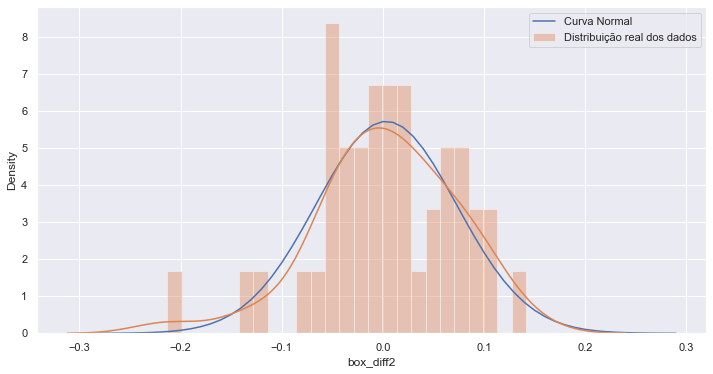

In [49]:
from scipy.stats import norm

mu = eth_mensal['box_diff2'].mean()
sigma = eth_mensal['box_diff2'].std()
x_axis = np.arange(-0.3, 0.3, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), label = 'Curva Normal')
sns.distplot(eth_mensal['box_diff2'], bins = 25, label = 'Distribuição real dos dados')
plt.legend(loc = 'best')

Os dados parecem ser normalmente distribuídos pela representação gráfica. Porém, para afirmar com maior confiança será realizado um teste estatístico:

In [50]:
import scipy

scipy.stats.normaltest(eth_mensal['box_diff2'].dropna())

NormaltestResult(statistic=5.286775474090552, pvalue=0.07111992537604292)

Com o p-valor retornado do teste é possível inferir que não há evidência estatística para negar a normalidade da série.

Deve-se avaliar as autocorrelações e autocorrelações parciais agora a partir do ACF e PACF

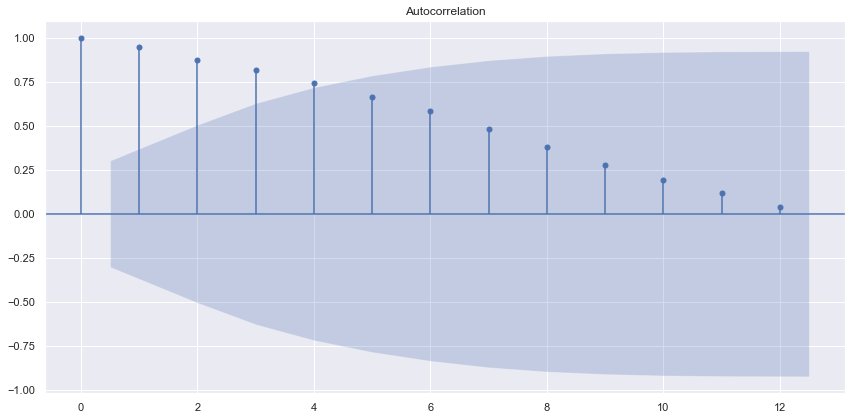

In [51]:
sm.graphics.tsa.plot_acf(eth_mensal.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

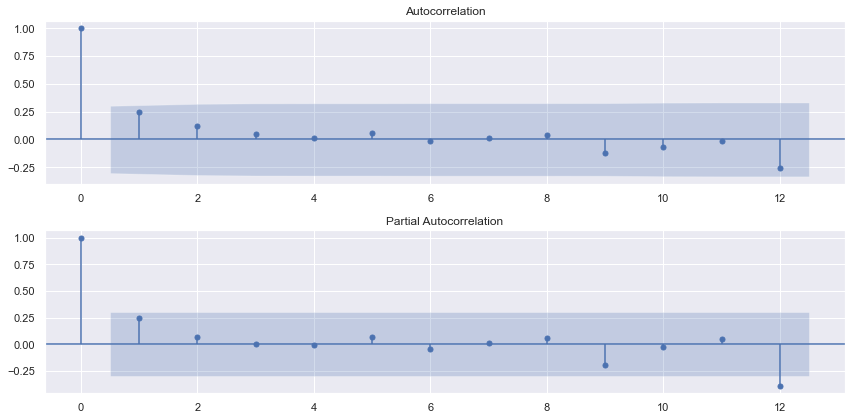

In [52]:
ax = plt.subplot(211)
# Plot a função de autocorrelação
sm.graphics.tsa.plot_acf(eth_mensal.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
# Plot a função de autocorrelação parcial
sm.graphics.tsa.plot_pacf(eth_mensal.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

Agora, será explorado diversas combinações de parâmetros para o modelo ARIMA e será avaliado seu desempenho através do AIC, que mede a adequação do modelo aos dados. Quanto menor seu valor, como anteriormente mencionado, melhor.

In [53]:
# Arranjo dos parâmetros
qs = range(0, 3)
ps = range(0, 3)
d=1
parametros = product(ps, qs)
lista_parametros = list(parametros)
len(lista_parametros)

# Seleção de modelo
resultados = []
melhor_aic = float("inf")
warnings.filterwarnings('ignore')
for parametro in lista_parametros:
    modelo = SARIMAX(eth_mensal.close_box, order=(parametro[0], d, parametro[1])).fit()
    aic = modelo.aic
    if aic < melhor_aic:
        melhor_modelo = modelo
        melhor_aic = aic
        melhor_parametro = parametro
    resultados.append([parametro, modelo.aic])

Com isso, serão filtrados os melhores modelos. Nota-se que os valores de AIC são negativos e, com isso, o maior AIC seria o melhor. Entretretando, como a diferença é pequena e o maior AIC (-166, aproximadamente) foi testado e obtido desempenho similar, decidiu-se por continuar com o código do jeito que está

In [54]:
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados.columns = ['parametros', 'aic']
print(tabela_resultados.sort_values(by = 'aic', ascending=True))

  parametros         aic
1     (0, 1) -171.095158
3     (1, 0) -170.557393
4     (1, 1) -169.387305
2     (0, 2) -169.288527
0     (0, 0) -169.064531
6     (2, 0) -168.661535
7     (2, 1) -167.401774
5     (1, 2) -167.251019
8     (2, 2) -165.993188


Agora, será feita uma análise mais detalhada do modelo que foi selecionado como melhor. Percebe-se que seus parâmetros parecem ser bem promissores

In [55]:
print(melhor_modelo.summary())

                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                   55
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  87.548
Date:                Tue, 28 Jun 2022   AIC                           -171.095
Time:                        15:29:44   BIC                           -167.117
Sample:                    11-30-2017   HQIC                          -169.561
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3056      0.122      2.509      0.012       0.067       0.544
sigma2         0.0023      0.000      4.829      0.000       0.001       0.003
Ljung-Box (L1) (Q):                   0.07   Jarque-

Será realizado teste de Dickey-Fuller nos resíduos do modelo, assim como feito no último modelo gerado. Deseja-se, como visto, menor p-valor possível para o teste nos resíduos.

In [56]:
print(f"Teste Dickey–Fuller: p={adfuller(melhor_modelo.resid[13:])[1]}")

Teste Dickey–Fuller: p=2.959262761503182e-13


O resultado do teste saiu como desejado e infere-se que a série dos resíduos é estacionária. Eles possuem homocedasticidade e que sua média não varia ao longo do tempo.

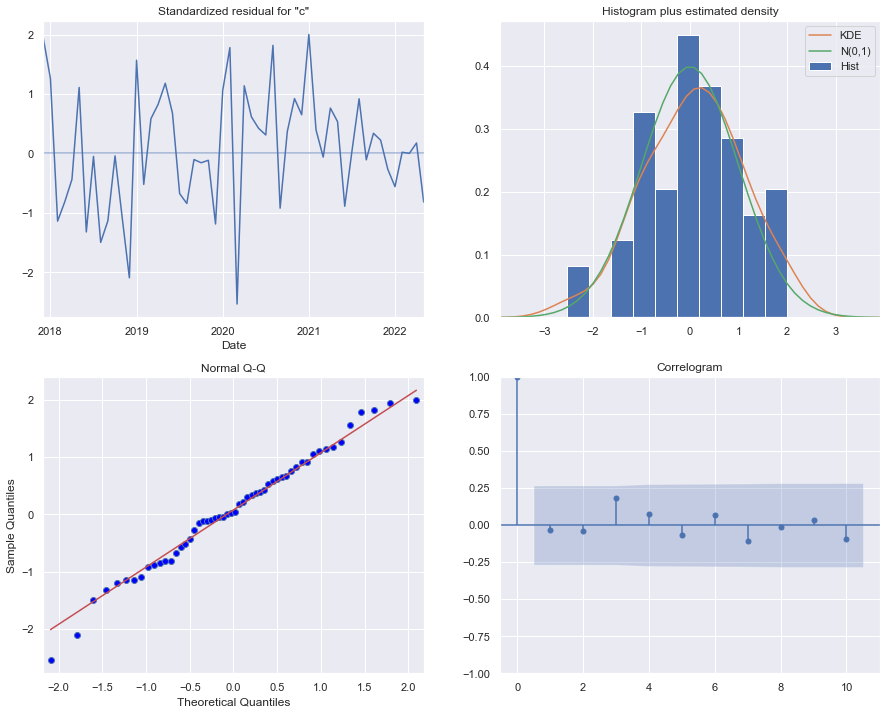

In [57]:
melhor_modelo.plot_diagnostics(figsize=(15, 12))
plt.show()

Agora, define-se a transformação inversa de Box-Cox para obter os valores de interesse da previsão do modelo. Abaixo, encontra-se a equação para a transformada. A partir dela, é possível inferir a equação da transformada inversa

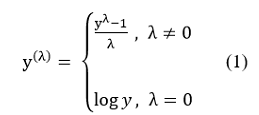

In [58]:
# Função de transformada inversa de boxcox
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

Assim, finalmente serão realizadas as predições e, a partir delas, poderá se avaliar o desempenho real do modelo

In [59]:
# Importando a função que ajuda no trabalho com datas do Python
from datetime import datetime

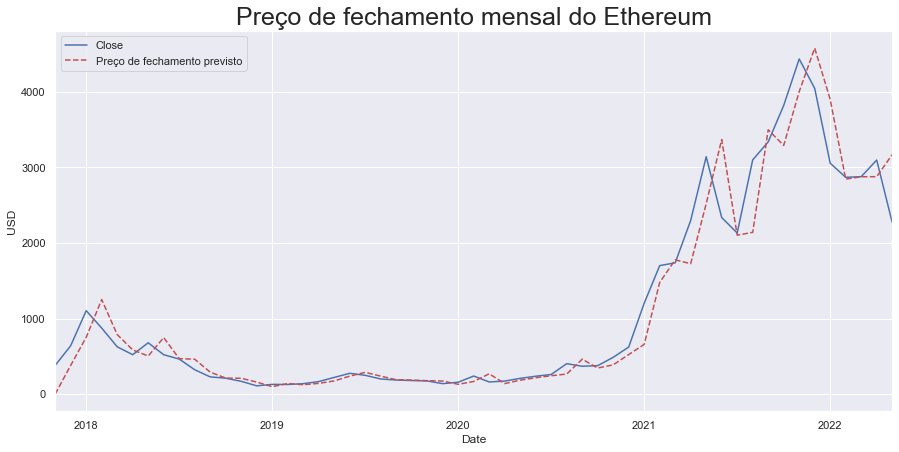

In [60]:
# Predições
eth_mensal['previsao_ARIMA'] = invboxcox(melhor_modelo.predict(start=0, end=len(eth_mensal)), lmbda)


plt.figure(figsize=(15,7))
eth_mensal.Close.plot()
eth_mensal['previsao_ARIMA'].plot(color='r', ls='--', label='Preço de fechamento previsto')
plt.legend()
plt.title('Preço de fechamento mensal do Ethereum', fontsize = 25)
plt.ylabel('USD')
plt.show()

O modelo parece se aproximar de uma forma satisfatória dos dados reais com uma certa defasagem

Agora, será realizado o ajuste do modelo SARIMA (passando também parâmetros sazonais). Para esta etapa, será realizado procedimento similar à etapa do modelo ARIMA visto acima: serão arranjadas diversas combinações de parâmetros, que serão testadas para obter o modelo melhor ajustado aos dados.

### Modelo SARIMAX

In [61]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parametros = product(ps, qs, Ps, Qs)
lista_parametros = list(parametros)
len(lista_parametros)

# Seleção do modelo
resultados = []
melhor_aic = float("inf")
warnings.filterwarnings('ignore')
for parametro in lista_parametros:
    try:
        model = SARIMAX(eth_mensal.close_box, order=(parametro[0], d, parametro[1]), seasonal_order=(parametro[2], D, parametro[3], 12)).fit(disp=-1)
    except:
        continue
    aic = model.aic
    if aic < melhor_aic:
        melhor_modelo = model
        melhor_aic = aic
        melhor_parametro = parametro
    resultados.append([parametro, model.aic])

In [62]:
# Melhores modelos
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados.columns = ['parametros', 'aic']
print(tabela_resultados.sort_values(by = 'aic', ascending=True).head(8))

      parametros         aic
19  (1, 0, 0, 1) -112.659613
22  (1, 0, 2, 0) -112.265423
7   (0, 1, 0, 1) -112.123716
10  (0, 1, 2, 0) -111.398089
23  (1, 0, 2, 1) -111.028724
21  (1, 0, 1, 1) -110.820422
37  (2, 0, 0, 1) -110.664328
28  (1, 1, 2, 0) -110.513813


In [63]:
print(melhor_modelo.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            close_box   No. Observations:                   55
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  59.330
Date:                              Tue, 28 Jun 2022   AIC                           -112.660
Time:                                      15:30:23   BIC                           -107.447
Sample:                                  11-30-2017   HQIC                          -110.749
                                       - 05-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3577      0.154      2.326      0.020       0.056       0.659
ma.S.L12      -0.96

In [64]:
print(f"Teste Dickey–Fuller: p-valor = {adfuller(melhor_modelo.resid[13:])[1]}")

Teste Dickey–Fuller: p-valor = 1.1274484483861346e-13


Com os valores obtidos de AIC e com a validação de estacionariedade para os resíduos pelo baixo p-valor obtido através do teste de Dickey-Fuller, o resultado parece promissor

A seguir, como na última etapa, será averiguado o comportamento dos resíduos mais detalhadamente:

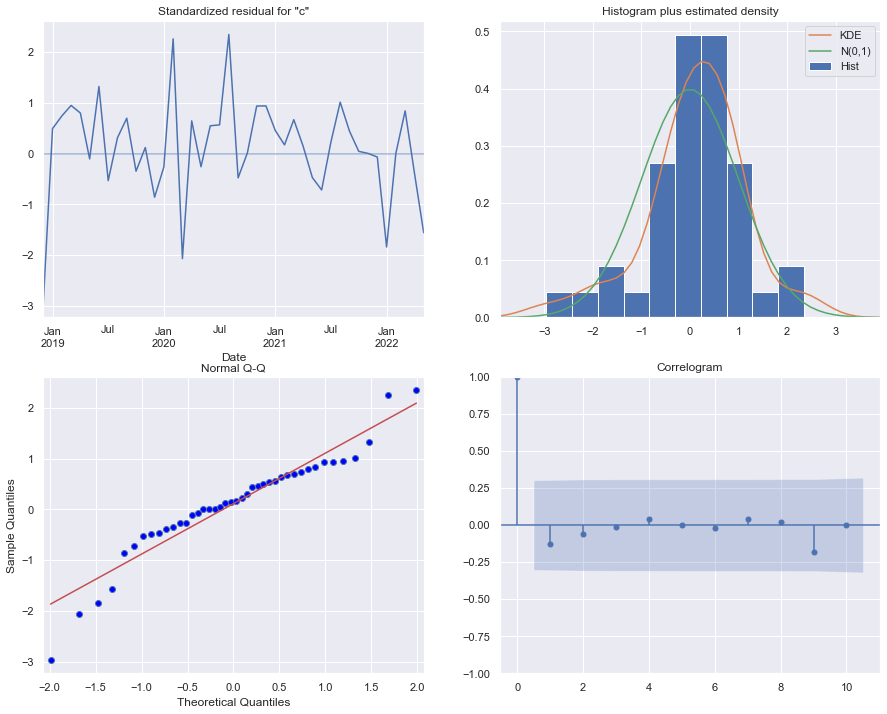

In [65]:
melhor_modelo.plot_diagnostics(figsize=(15, 12))
plt.show()

teste Dickey–Fuller: p=1.1274484483861346e-13


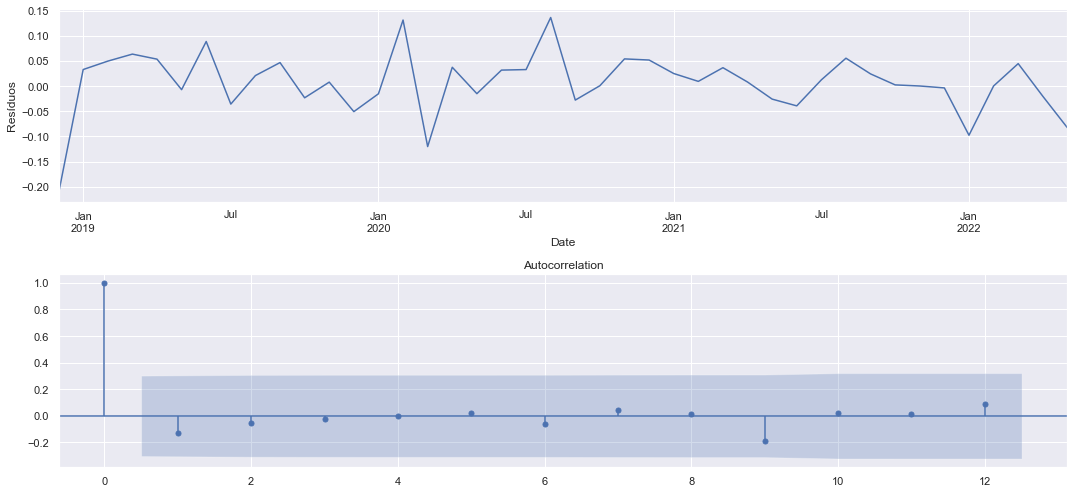

In [66]:
# Decomposição
plt.figure(figsize=(15,7))
plt.subplot(211)
melhor_modelo.resid[13:].plot()
plt.ylabel(u'Resíduos')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(melhor_modelo.resid[13:].values.squeeze(), lags=12, ax=ax)

print(f"teste Dickey–Fuller: p={adfuller(melhor_modelo.resid[13:])[1]}")

plt.tight_layout()
plt.show()

Assim, finalmente, será plotado o resultado da predição:

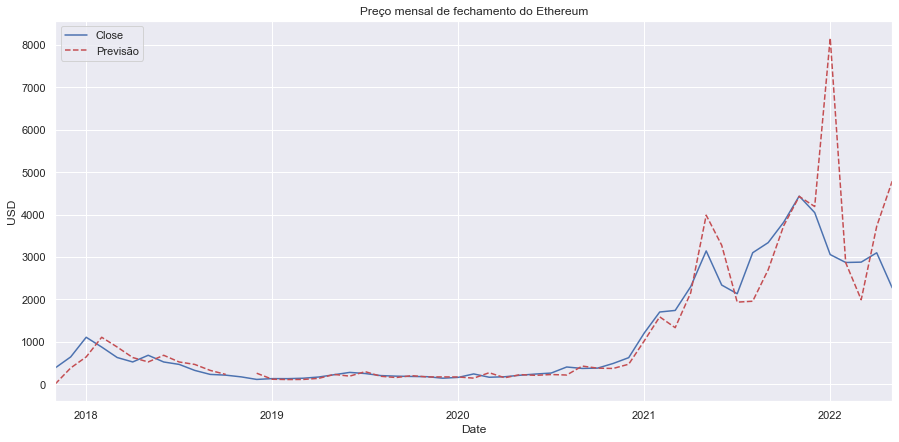

In [67]:
# Predição
eth_mensal['previsao_SARIMA'] = invboxcox(melhor_modelo.predict(start=0, end=75), lmbda)

plt.figure(figsize=(15,7))
eth_mensal.Close.plot()
eth_mensal['previsao_SARIMA'].plot(color='r', ls='--', label='Previsão')
plt.legend()
plt.title('Preço mensal de fechamento do Ethereum')
plt.ylabel('USD')
plt.show()

O modelo SARIMA treinado parece se ajustar bem aos dados pela análise visual realizada comparando com os valores reais. Para inferir sua performance de forma mais confiável, serão realizadas, em seguida, algumas validações:

### Validações

Como forma de avaliação dos modelos e seus respectivos desempenhos, serão calculadas algumas métricas de erro para fins de apuração de sua performance

#### Erro Médio Absoluto - MAE 

O erro médio absoluto (MAE - Mean Absolute Error). Esta métrica, como o próprio nome sugere, calcula a média dos módulos dos erros, que, por sua vez, são calculados como a diferença entre o valor real e o valor previsto pelo modelo nesse estudo. O módulo é utilizado para que os erros positivos nao cancelem os negativos e vice versa, assim calcula-se apenas a distancia. A equação do MAE pode ser vista abaixo:


<img src="https://www.alura.com.br/artigos/assets/metricas-de-avaliacao-para-series-temporais/img-02.png" width="400">


#### Erro Quadrático médio - RMSE

O erro quadrático médio (MSE - Mean Squared Error) é comumente utilizado em série temporais também. A difença dele para o MAE é que ele eleva ao quadrado a diferença entre o valor real e o previsto. Assim, erros maiores são mais penalizados. Essa abordagem é particularmente interessante quando se avalia previsão e valores reais de ativos financeiros, já que erros maiores podem gerar grandes perdas monetárias. Neste estudo, será utilizada a RMSE (Root Mean Squared Error), que é simplesmente a raiz do MSE .A equação do RMSE pode ser verificada abaixo:

<img src="https://www.alura.com.br/artigos/assets/metricas-de-avaliacao-para-series-temporais/img-04.png" width="400">

#### Média Percentual Absoluta do erro - RMSE

A raiz quadrada do erro médio (MAPE - Mean Absolute Percentage Error) mede o erro em porcentagem. Assim, é calculado da seguinte maneira:

<img src="https://www.alura.com.br/artigos/assets/metricas-de-avaliacao-para-series-temporais/img-05.png" width="400">

#### Conhecendo as métricas de erros utilizadas neste estudo, agora deve-se calcular cada uma delas para os modelos gerados anteriormente

#### Modelo ARIMA

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = eth_mensal.Close['2019-01-01':'2022-05-01']
previsto_arima = eth_mensal['previsao_ARIMA']['2019-01-01':'2022-05-01']

mae_arima = mean_absolute_error(real, previsto_arima)
rmse_arima = mean_squared_error(real, previsto_arima, squared=False)
mape_arima = mean_absolute_percentage_error(real, previsto_arima)

#### Modelo SARIMA

In [69]:
previsto_sarima = eth_mensal['previsao_SARIMA']['2019-01-01':'2022-05-01']

mae_sarima = mean_absolute_error(real, previsto_sarima)
rmse_sarima = mean_squared_error(real, previsto_sarima, squared=False)
mape_sarima = mean_absolute_percentage_error(real, previsto_sarima)

### Comparando os modelos 

In [70]:
tabela_erros = {'MAE': [mae_arima, mae_sarima], "RMSE": [rmse_arima, rmse_sarima], "MAPE": ['{:.1%}'.format(mape_arima), '{:.1%}'.format(mape_sarima)]}
pd.options.display.float_format = '{:,.2f}'.format
df_erros = pd.DataFrame(tabela_erros, index = ["ARIMA", 'SARIMA']).transpose()

In [71]:
df_erros

ARIMA SARIMA
MAE  195.33 316.27
RMSE 341.39 880.32
MAPE  17.1%  21.6%

#### Nota-se que o modelo ARIMA se sai melhor em todas as métricas de erros